In [62]:
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.python.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

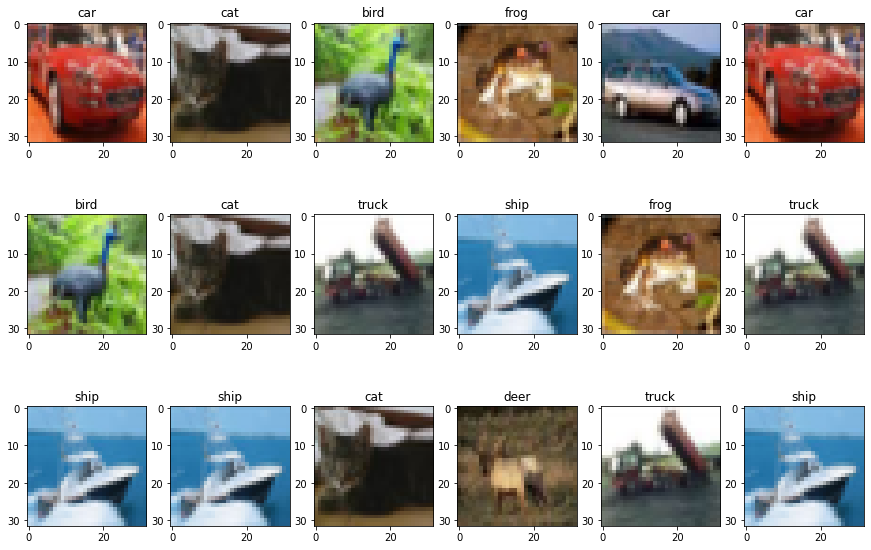

In [63]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, num_classes)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

In [67]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [47]:
print(len(classes))

10


In [68]:
# Compute the class histogram
from collections import Counter
hist = Counter(classes)
print(hist)

Counter({9: 'truck', 8: 'ship', 0: 'plane', 7: 'horse', 6: 'frog', 5: 'dog', 4: 'deer', 3: 'cat', 1: 'car', 2: 'bird'})


### Step 1: Data Preparation

In [69]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [70]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 10)


### Step 2: Building the Classifier

In [71]:
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

# Build the classifier
model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1153

### Step 3: Training

In [72]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
352/352 [==============================] - 35s 97ms/step - loss: 1.7625 - accuracy: 0.3737 - val_loss: 1.5807 - val_accuracy: 0.4466
Epoch 2/25
352/352 [==============================] - 33s 94ms/step - loss: 1.4447 - accuracy: 0.4928 - val_loss: 1.3622 - val_accuracy: 0.5174
Epoch 3/25
352/352 [==============================] - 35s 100ms/step - loss: 1.3369 - accuracy: 0.5329 - val_loss: 1.2928 - val_accuracy: 0.5500
Epoch 4/25
352/352 [==============================] - 34s 97ms/step - loss: 1.2648 - accuracy: 0.5568 - val_loss: 1.2196 - val_accuracy: 0.5746
Epoch 5/25
352/352 [==============================] - 35s 99ms/step - loss: 1.2123 - accuracy: 0.5785 - val_loss: 1.1959 - val_accuracy: 0.5850
Epoch 6/25
352/352 [==============================] - 34s 96ms/step - loss: 1.1672 - accuracy: 0.5938 - val_loss: 1.1341 - val_accuracy: 0.6098
Epoch 7/25
352/352 [==============================] - 35s 100ms/step - loss: 1.1353 - accuracy: 0.6063 - val_loss: 1.1356 - val_accurac

Train Acc      0.6969777941703796
Validation Acc 0.6639999747276306


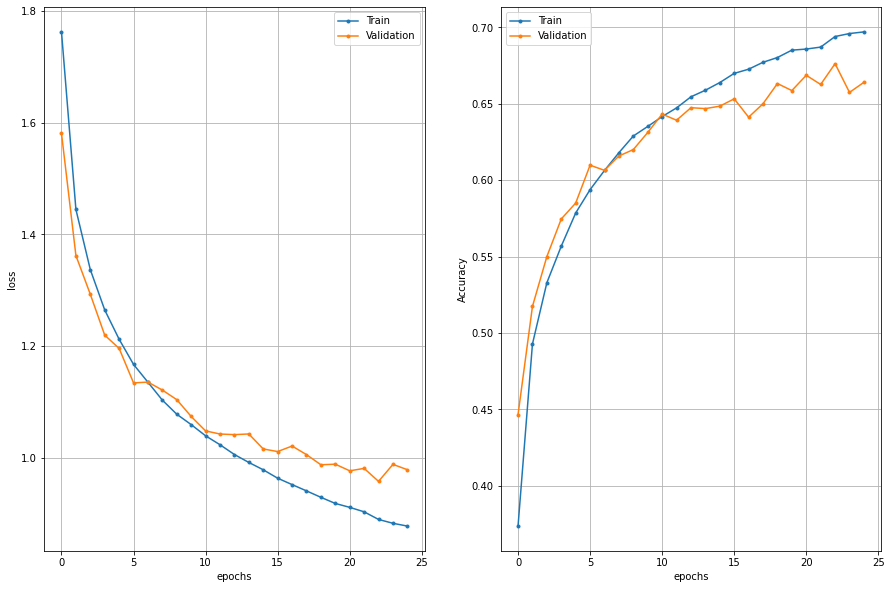

In [73]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In [74]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

In [75]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():

    class_indices = np.where(y_true == class_id)[0]
    class_accuracy = np.mean(y_true[class_indices] == y_pred[class_indices])
    
    print(f"{class_name}: {class_accuracy:.4f}")

plane: 0.7330
car: 0.7840
bird: 0.5910
cat: 0.5090
deer: 0.5090
dog: 0.5140
frog: 0.6800
horse: 0.7760
ship: 0.7170
truck: 0.7680


In [76]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.9979 - accuracy: 0.6581
Test loss   0.997865617275238
Test metric 0.6581000089645386


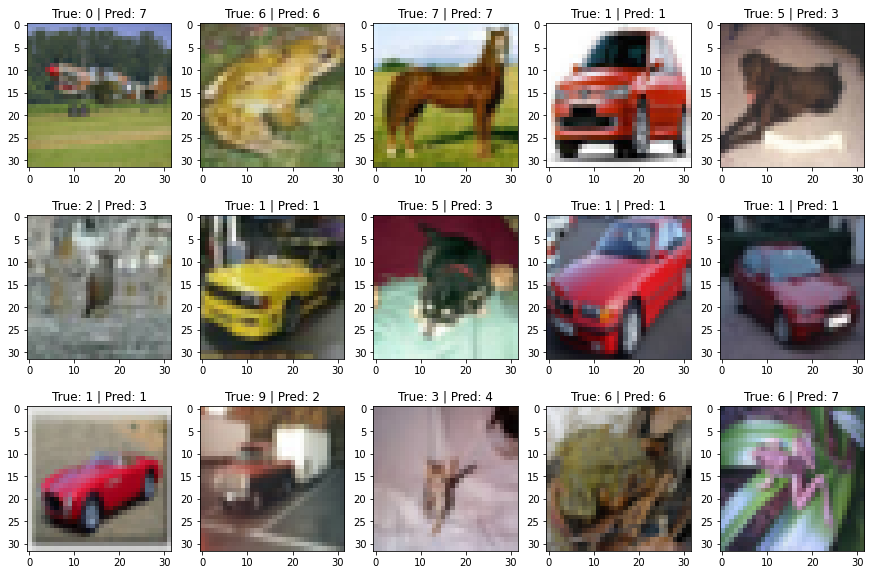

In [77]:
for ii in range(15):
    idx = np.random.randint(0, len(y_pred))
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...], cmap='gray')
    plt.title('True: ' + str(y_true[idx]) + ' | Pred: ' + str(y_pred[idx]))

### Questions
### 1) What is the overall accuracy of the classifier?
Overall accuracy is = Test metric 0.6581000089645386 = 66%

### 2)What modifications would you do in order to improve the classification accuracy?
We can do different modifications to improve the classification accuracy of a deep learning model like "increasing the size of the training dataset", using Data Augmentation, or just adjust hyperparameters (such as learning rate, batch size,)
### 3)Make one modification (that you think can help) and train the classifier again. Does the accuracy improve?